In [590]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [591]:
df=pd.read_csv("Mall_Customers.csv")

In [592]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [594]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [595]:
df.shape


(200, 5)

In [596]:
df.duplicated().sum()

0

In [597]:
df["Gender"].value_counts()

,count
Gender,
Female,112
Male,88


In [598]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [599]:
df1=df.select_dtypes(include="number")
df1.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


<Axes: >

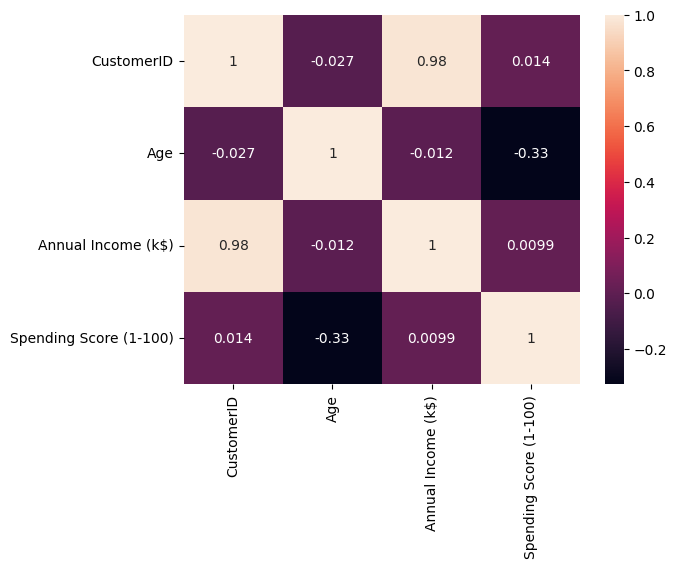

In [600]:
corr=df1.corr()
sns.heatmap(corr,annot=True)

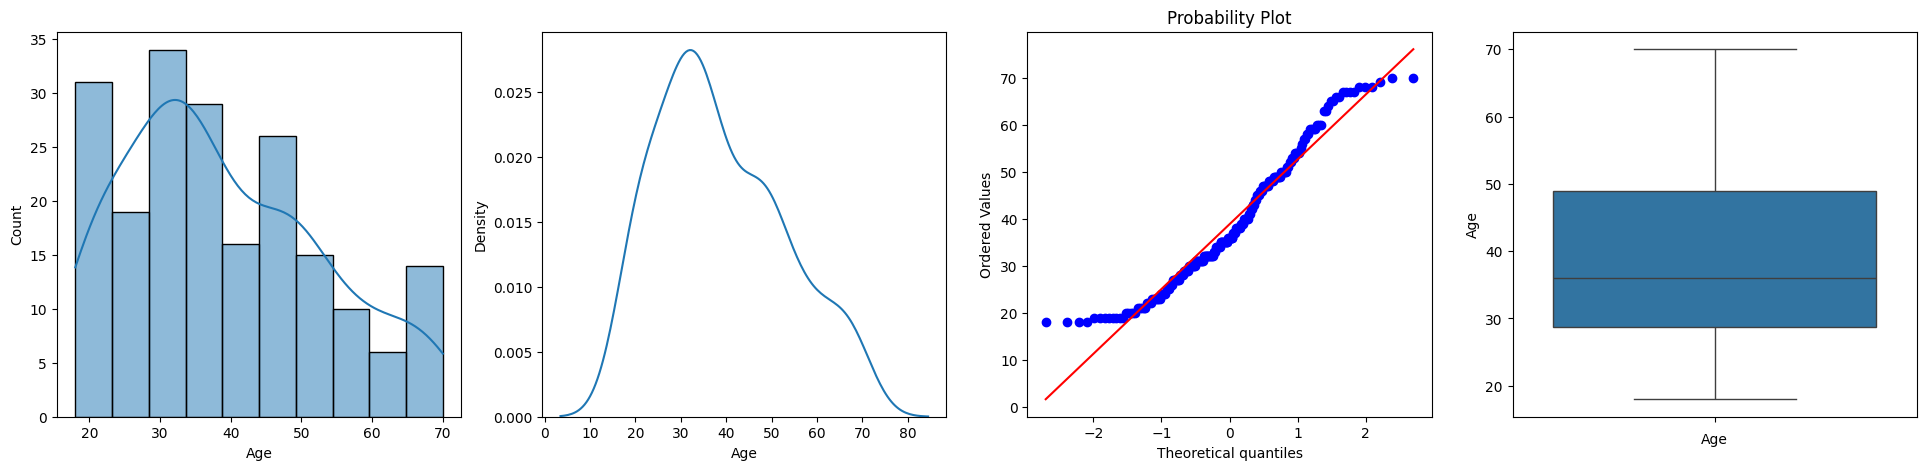

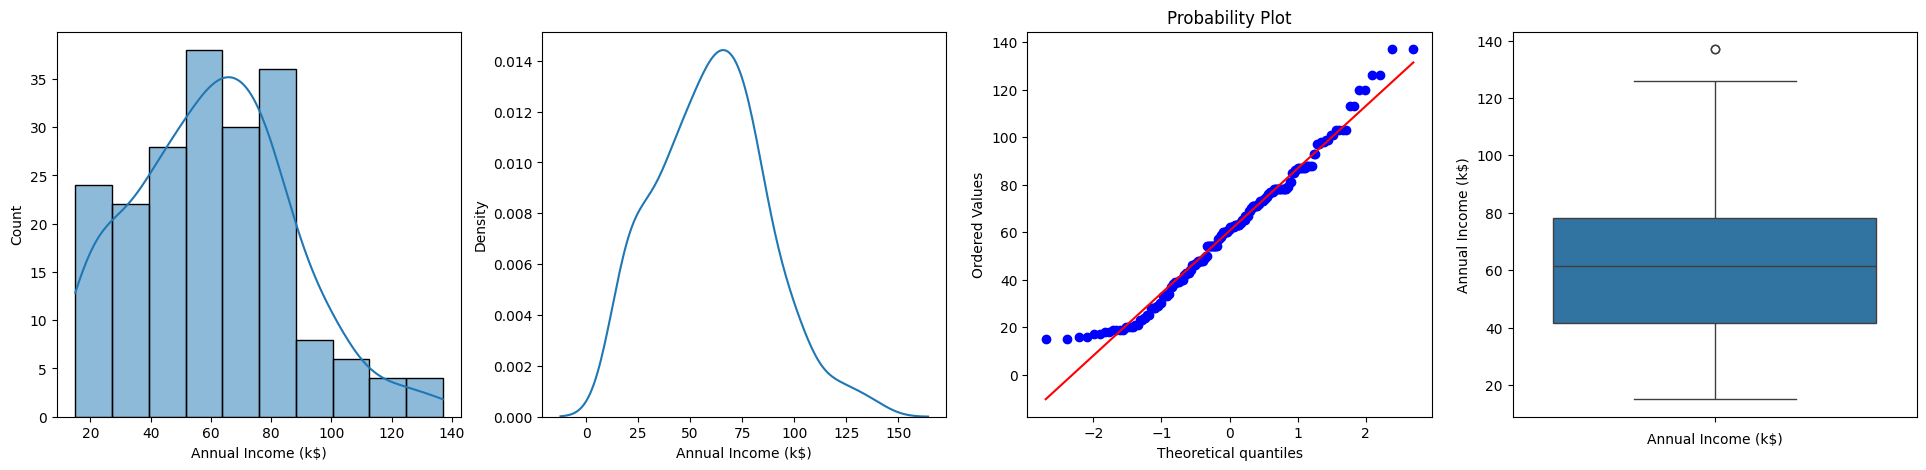

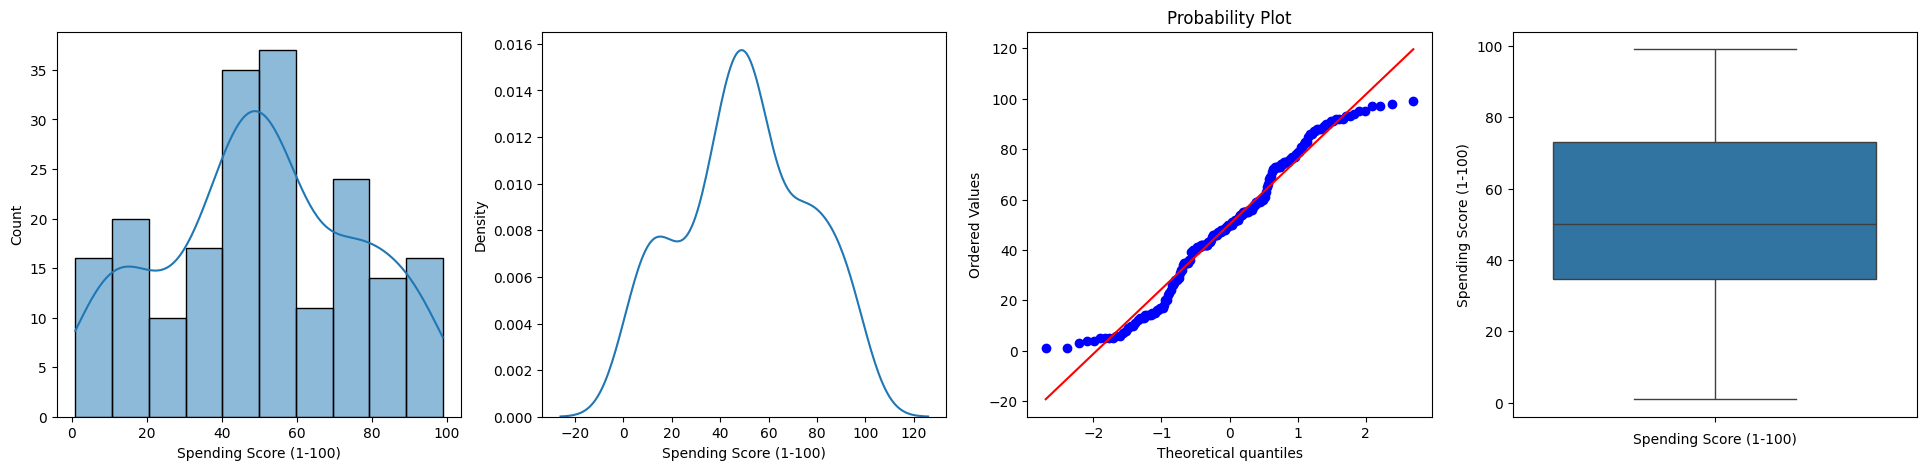

In [601]:
list=["Age","Annual Income (k$)","Spending Score (1-100)"]
for i in list:
  plt.figure(figsize=(24,5))
  plt.subplot(141)
  sns.histplot(df1[i],bins=10,kde=True)
  plt.subplot(142)
  sns.distplot(df1[i],hist=False)
  plt.subplot(143)
  stats.probplot(df1[i],plot=plt)
  plt.subplot(144)
  sns.boxplot(df1[i])
  plt.xlabel(i)
plt.show()



<Axes: xlabel='Gender', ylabel='count'>

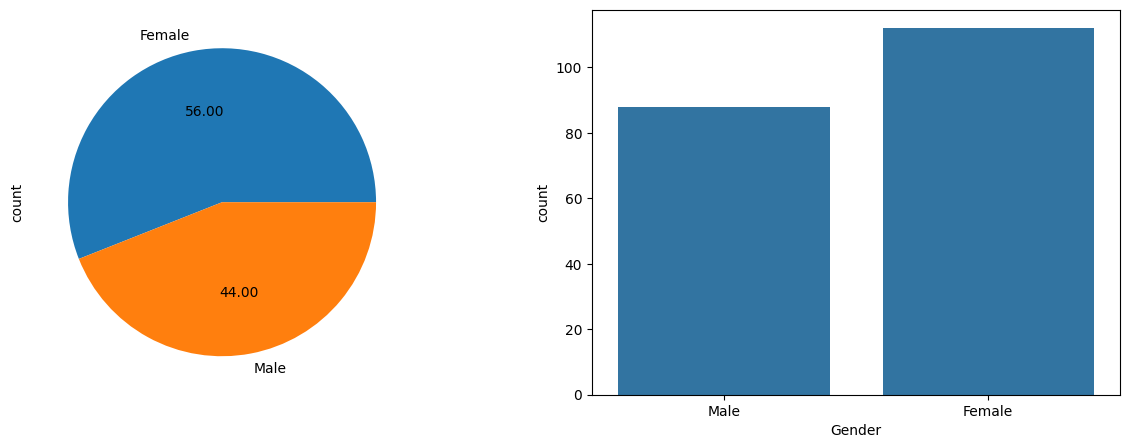

In [602]:
plt.figure(figsize=(15,5))
plt.subplot(121)
df["Gender"].value_counts().plot(kind="pie",autopct="%.2f")
plt.subplot(122)
sns.countplot(df,x="Gender")

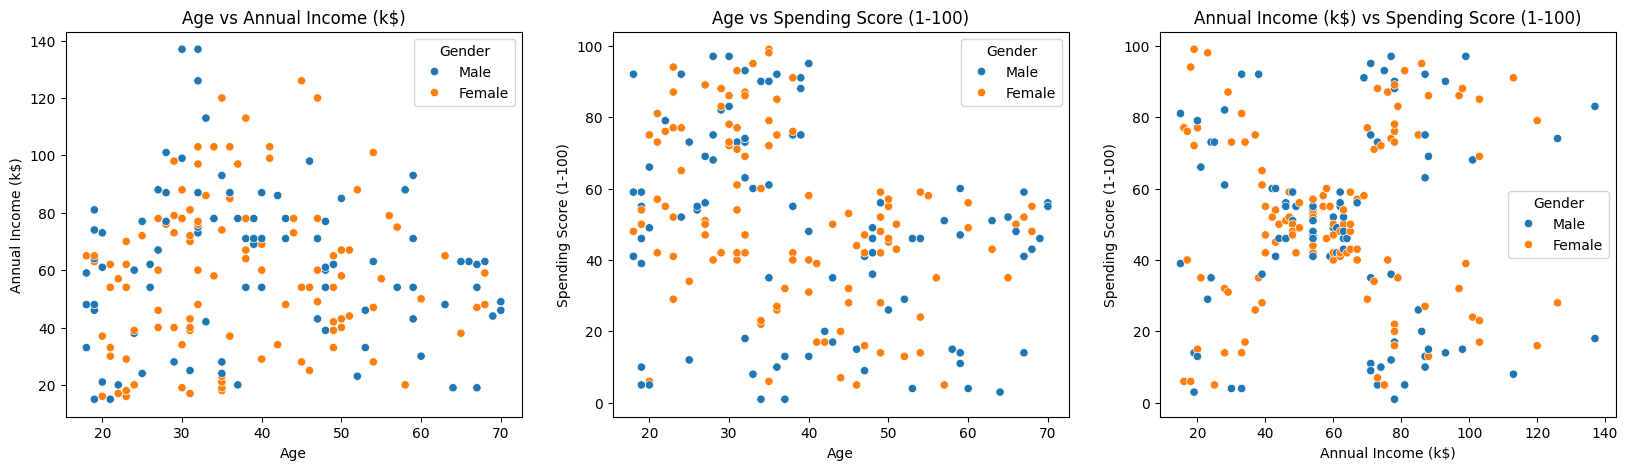

In [603]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.scatterplot(x=df1["Age"],y=df1["Annual Income (k$)"],hue=df["Gender"])
plt.title("Age vs Annual Income (k$)")
plt.subplot(132)
sns.scatterplot(x=df1["Age"],y=df1["Spending Score (1-100)"],hue=df["Gender"])
plt.title("Age vs Spending Score (1-100)")
plt.subplot(133)
sns.scatterplot(x=df1["Annual Income (k$)"],y=df1["Spending Score (1-100)"],hue=df["Gender"])
plt.title("Annual Income (k$) vs Spending Score (1-100)")
plt.show()

<Axes: >

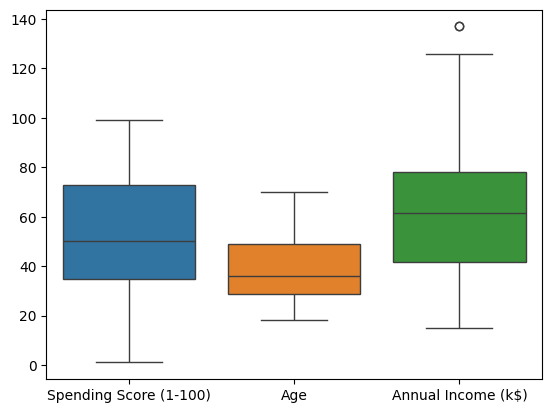

In [604]:
sns.boxplot(df1[['Spending Score (1-100)','Age','Annual Income (k$)']])

In [605]:
df1.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [606]:
def remove_outlier(df1,i):
  Q1=df1[i].quantile(0.25)
  Q3=df1[i].quantile(0.75)
  IQR=Q3-Q1
  LOW_LIM=(Q1-1.5*IQR)
  UP_LIM=(Q3+1.5*IQR)
  df2=df1[(df1[i]>=LOW_LIM) & (df1[i]<=UP_LIM)]
  df2.reset_index(drop=True,inplace=True)
  return df2


df_fil=remove_outlier(df1,"Annual Income (k$)")
df_fil.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


<Axes: >

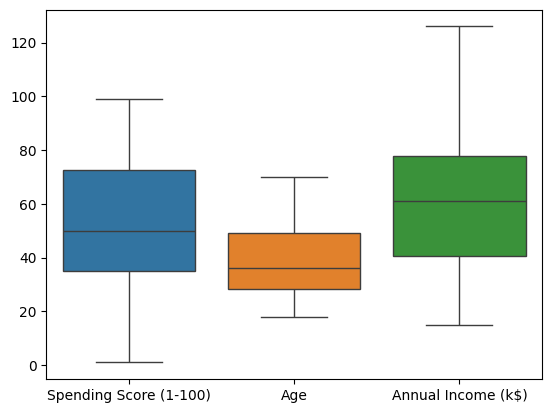

In [607]:
sns.boxplot(df_fil[['Spending Score (1-100)','Age','Annual Income (k$)']])

#elbow method

In [608]:
from sklearn.cluster import KMeans

In [609]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_fil[["Annual Income (k$)"]]=scaler.fit_transform(df_fil[["Annual Income (k$)"]])
df_fil[["Spending Score (1-100)"]]=scaler.fit_transform(df_fil[["Spending Score (1-100)"]])
df_fil.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,0.000000,0.387755
1,2,21,0.000000,0.816327
2,3,20,0.009009,0.051020
3,4,23,0.009009,0.775510
4,5,31,0.018018,0.397959


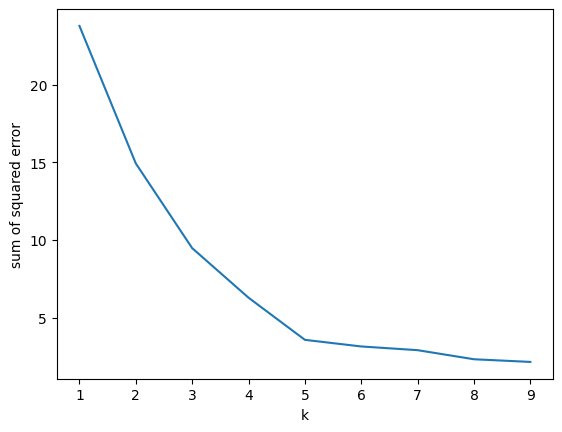

In [610]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df_fil[["Annual Income (k$)","Spending Score (1-100)"]])
  sse.append(km.inertia_)
  sse
plt.xlabel("k")
plt.ylabel("sum of squared error")
plt.plot(k_rng,sse)

In [611]:
km=KMeans(n_clusters=5)
df_fil["cluster"]=km.fit_predict(df_fil[["Annual Income (k$)","Spending Score (1-100)"]])
df_fil.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,0.000000,0.387755,3
1,2,21,0.000000,0.816327,0
2,3,20,0.009009,0.051020,3
3,4,23,0.009009,0.775510,0
4,5,31,0.018018,0.397959,3


In [612]:
df_1=df_fil[df_fil.cluster==0]
df_2=df_fil[df_fil.cluster==1]
df_3=df_fil[df_fil.cluster==2]
df_4=df_fil[df_fil.cluster==3]
df_5=df_fil[df_fil.cluster==4]



In [613]:
x=km.cluster_centers_[:,0]

In [614]:
y=km.cluster_centers_[:,1]

<Axes: >

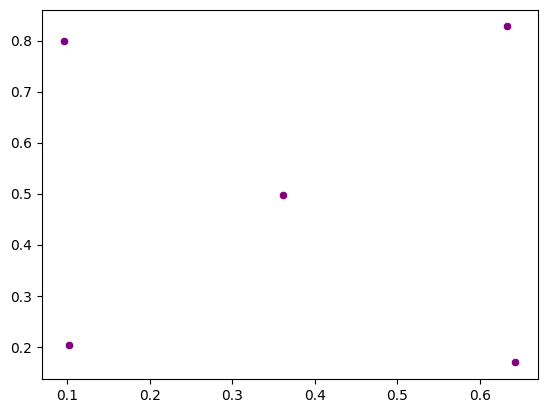

In [615]:
sns.scatterplot(x=x,y=y,color="purple",markers="*",)

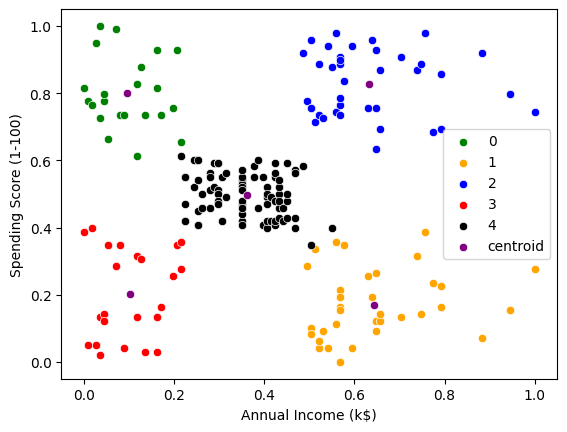

In [616]:
sns.scatterplot(x=df_1["Annual Income (k$)"],y=df_1["Spending Score (1-100)"],color="green",label="0")
sns.scatterplot(x=df_2["Annual Income (k$)"],y=df_2["Spending Score (1-100)"],color="orange",label="1")
sns.scatterplot(x=df_3["Annual Income (k$)"],y=df_3["Spending Score (1-100)"],color="blue",label="2")
sns.scatterplot(x=df_4["Annual Income (k$)"],y=df_4["Spending Score (1-100)"],color="red",label="3")
sns.scatterplot(x=df_5["Annual Income (k$)"],y=df_5["Spending Score (1-100)"],color="black",label="4")
sns.scatterplot(x=x,y=y,color="purple",markers="*",label="centroid")
plt.legend()

In [617]:
y_pred=km.fit_predict(df_fil[["Annual Income (k$)","Spending Score (1-100)"]])

In [618]:
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
      dtype=int32)

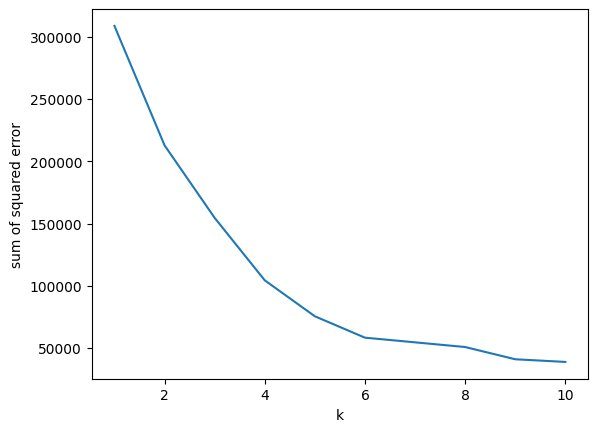

In [619]:
x=df[["Age","Annual Income (k$)","Spending Score (1-100)"]]
k_rng=range(1,11)
sse=[]
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(x)
  sse.append(km.inertia_)
  sse
plt.xlabel("k")
plt.ylabel("sum of squared error")
plt.plot(k_rng,sse)

In [620]:
km=KMeans(n_clusters=6)
s=pd.DataFrame()
x["cluster"]=km.fit_predict(x)
s["CustomerID"]=df["CustomerID"]

x=pd.concat([s,x],axis=1)

In [621]:
x_1=x[x.cluster==0]
x_2=x[x.cluster==0]
x_3=x[x.cluster==2]
x_4=x[x.cluster==3]
x_5=x[x.cluster==4]
x_6=x[x.cluster==5]

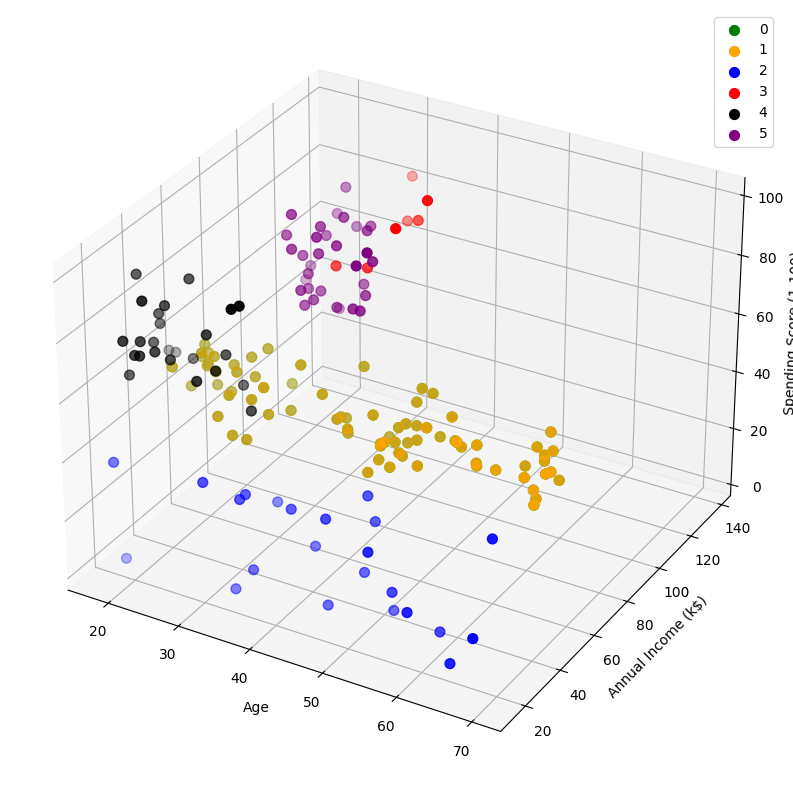

In [622]:
fig = plt.figure(figsize=(40,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(x_1["Age"],x_1["Annual Income (k$)"],x_1["Spending Score (1-100)"],color="green",label="0",s=50)
ax.scatter(x_2["Age"],x_2["Annual Income (k$)"],x_2["Spending Score (1-100)"],color="orange",label="1",s=50)
ax.scatter(x_3["Age"],x_3["Annual Income (k$)"],x_3["Spending Score (1-100)"],color="blue",label="2",s=50)
ax.scatter(x_4["Age"],x_4["Annual Income (k$)"],x_4["Spending Score (1-100)"],color="red",label="3",s=50)
ax.scatter(x_5["Age"],x_5["Annual Income (k$)"],x_5["Spending Score (1-100)"],color="black",label="4",s=50)
ax.scatter(x_6["Age"],x_6["Annual Income (k$)"],x_6["Spending Score (1-100)"],color="purple",label="5",s=50)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [623]:
print(f"The number of customers in 1st group are {len(x_1)}")
print(f'Those are: {x_1["CustomerID"].values}')
print()
print(f"The number of customers in 1st group are {len(x_2)}")
print(f'Those are: {x_2["CustomerID"].values}')
print()
print(f"The number of customers in 1st group are {len(x_3)}")
print(f'Those are: {x_3["CustomerID"].values}')
print()
print(f"The number of customers in 1st group are {len(x_4)}")
print(f'Those are: {x_4["CustomerID"].values}')
print()
print(f"The number of customers in 1st group are {len(x_5)}")
print(f'Those are: {x_5["CustomerID"].values}')
print()
print(f"The number of customers in 1st group are {len(x_6)}")
print(f'Those are: {x_6["CustomerID"].values}')
print()

The number of customers in 1st group are 77
Those are: [ 47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  67  68  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 127 143]

The number of customers in 1st group are 77
Those are: [ 47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  67  68  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 127 143]

The number of customers in 1st group are 23
Those are: [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]

The number of customers in 1st group are 7
Those are: [188 190 192 194 196 198 200]

The number of customers in 1st group are 25
Thos